
# Algoritmo di apprendimento del Perceptron

In [9]:
def perceptron_learning_rule(X, y, epochs, learning_rate):
    # Initialize weights and bias
    w = [0.0, 0.0]  # weights for x1 and x2
    b = 0.0         # bias

    # Iterate through the data multiple times
    for _ in range(epochs):
        for i in range(len(X)):
            # Calculate the perceptron output
            weighted_sum = X[i][0] * w[0] + X[i][1] * w[1] + b
            output = 1 if weighted_sum >= 0 else 0

            # Calculate the error
            error = y[i] - output

            # Update weights and bias
            w[0] += learning_rate * error * X[i][0]
            w[1] += learning_rate * error * X[i][1]
            b += learning_rate * error

    return w, b


# Addestramento (Training) del Perceptron

In [4]:
# NAND gate truth table
X = [
    [0, 0],  # Input (x1, x2)
    [0, 1],
    [1, 0],
    [1, 1]
]

y = [
    1,  # Output for (0, 0)
    1,  # Output for (0, 1)
    1,  # Output for (1, 0)
    0   # Output for (1, 1)
]

# Train the perceptron
epochs = 100
learning_rate = 0.1
weights, bias = perceptron_learning_rule(X, y, epochs, learning_rate)

# Display the resulting weights and bias
weights, bias


([-0.2, -0.1], 0.2)


# Tracciare il confine della decisione (Decision Boundary)

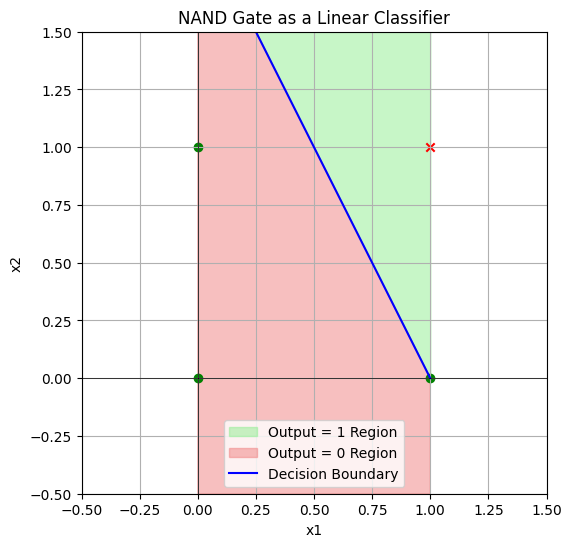

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Weights and bias
weights = [-0.2, -0.1]
bias = 0.2

# Define the decision boundary line: w1*x1 + w2*x2 + b = 0
# Rearrange to solve for x2: x2 = (-w1/w2) * x1 - (b/w2)
def decision_boundary(x1):
    return (-weights[0] / weights[1]) * x1 - (bias / weights[1])

# Generate points for the decision boundary line
x1_values = np.array([0, 1])  # x1 ranges from 0 to 1
x2_values = decision_boundary(x1_values)

# Plotting
plt.figure(figsize=(6, 6))


# Fill the regions with colors
plt.fill_between(x1_values, x2_values, 1.5, color='lightgreen', alpha=0.5, label="Output = 1 Region")
plt.fill_between(x1_values, x2_values, -0.5, color='lightcoral', alpha=0.5, label="Output = 0 Region")


plt.plot(x1_values, x2_values, label="Decision Boundary", color='blue')

# Plot the input points
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])  # Expected NAND outputs

for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i][0], X[i][1], color='green', marker='o')
    else:
        plt.scatter(X[i][0], X[i][1], color='red', marker='x')

# Annotate the plot
plt.title("NAND Gate as a Linear Classifier")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
